# **Part 1: DATA PRE-PROCESSING**

**1. Importing Libraries**








In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score, mean_squared_error


In [164]:
df = pd.read_csv('Housing_updated.csv')
df_copy = df.copy(deep=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [165]:
df.shape

(545, 13)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [167]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [168]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [169]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

**Observations:**



*   Data size is (545,13)

*   None of the columns has Null values 


*   **'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'** has numerical values

*   **'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning'
       , 'prefarea'**  has yes/no values


*   **'furnishingstatus'** has three values viz. *'furnished', 'semi-furnished', 'unfurnished'*





**3. Changing yes/no values to 1/0**

In [170]:
cat_columns = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'prefarea']

def binary_mapping(x):
  return x.map({'yes': 1, "no": 0})

df[cat_columns] = df[cat_columns].apply(binary_mapping)

In [171]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


**4. Encoding Furnishing Status**

We use One Hot Encoding here, as there are three categories & none of which can't be assigned any values randomly.

        https://stackoverflow.com/a/56339153/16821645

In [172]:
df['furnishingstatus'] = df['furnishingstatus'].replace({'semi-furnished': 0, 'furnished': 1,'unfurnished':2})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [173]:

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


# **Part 2: Data Visualization**

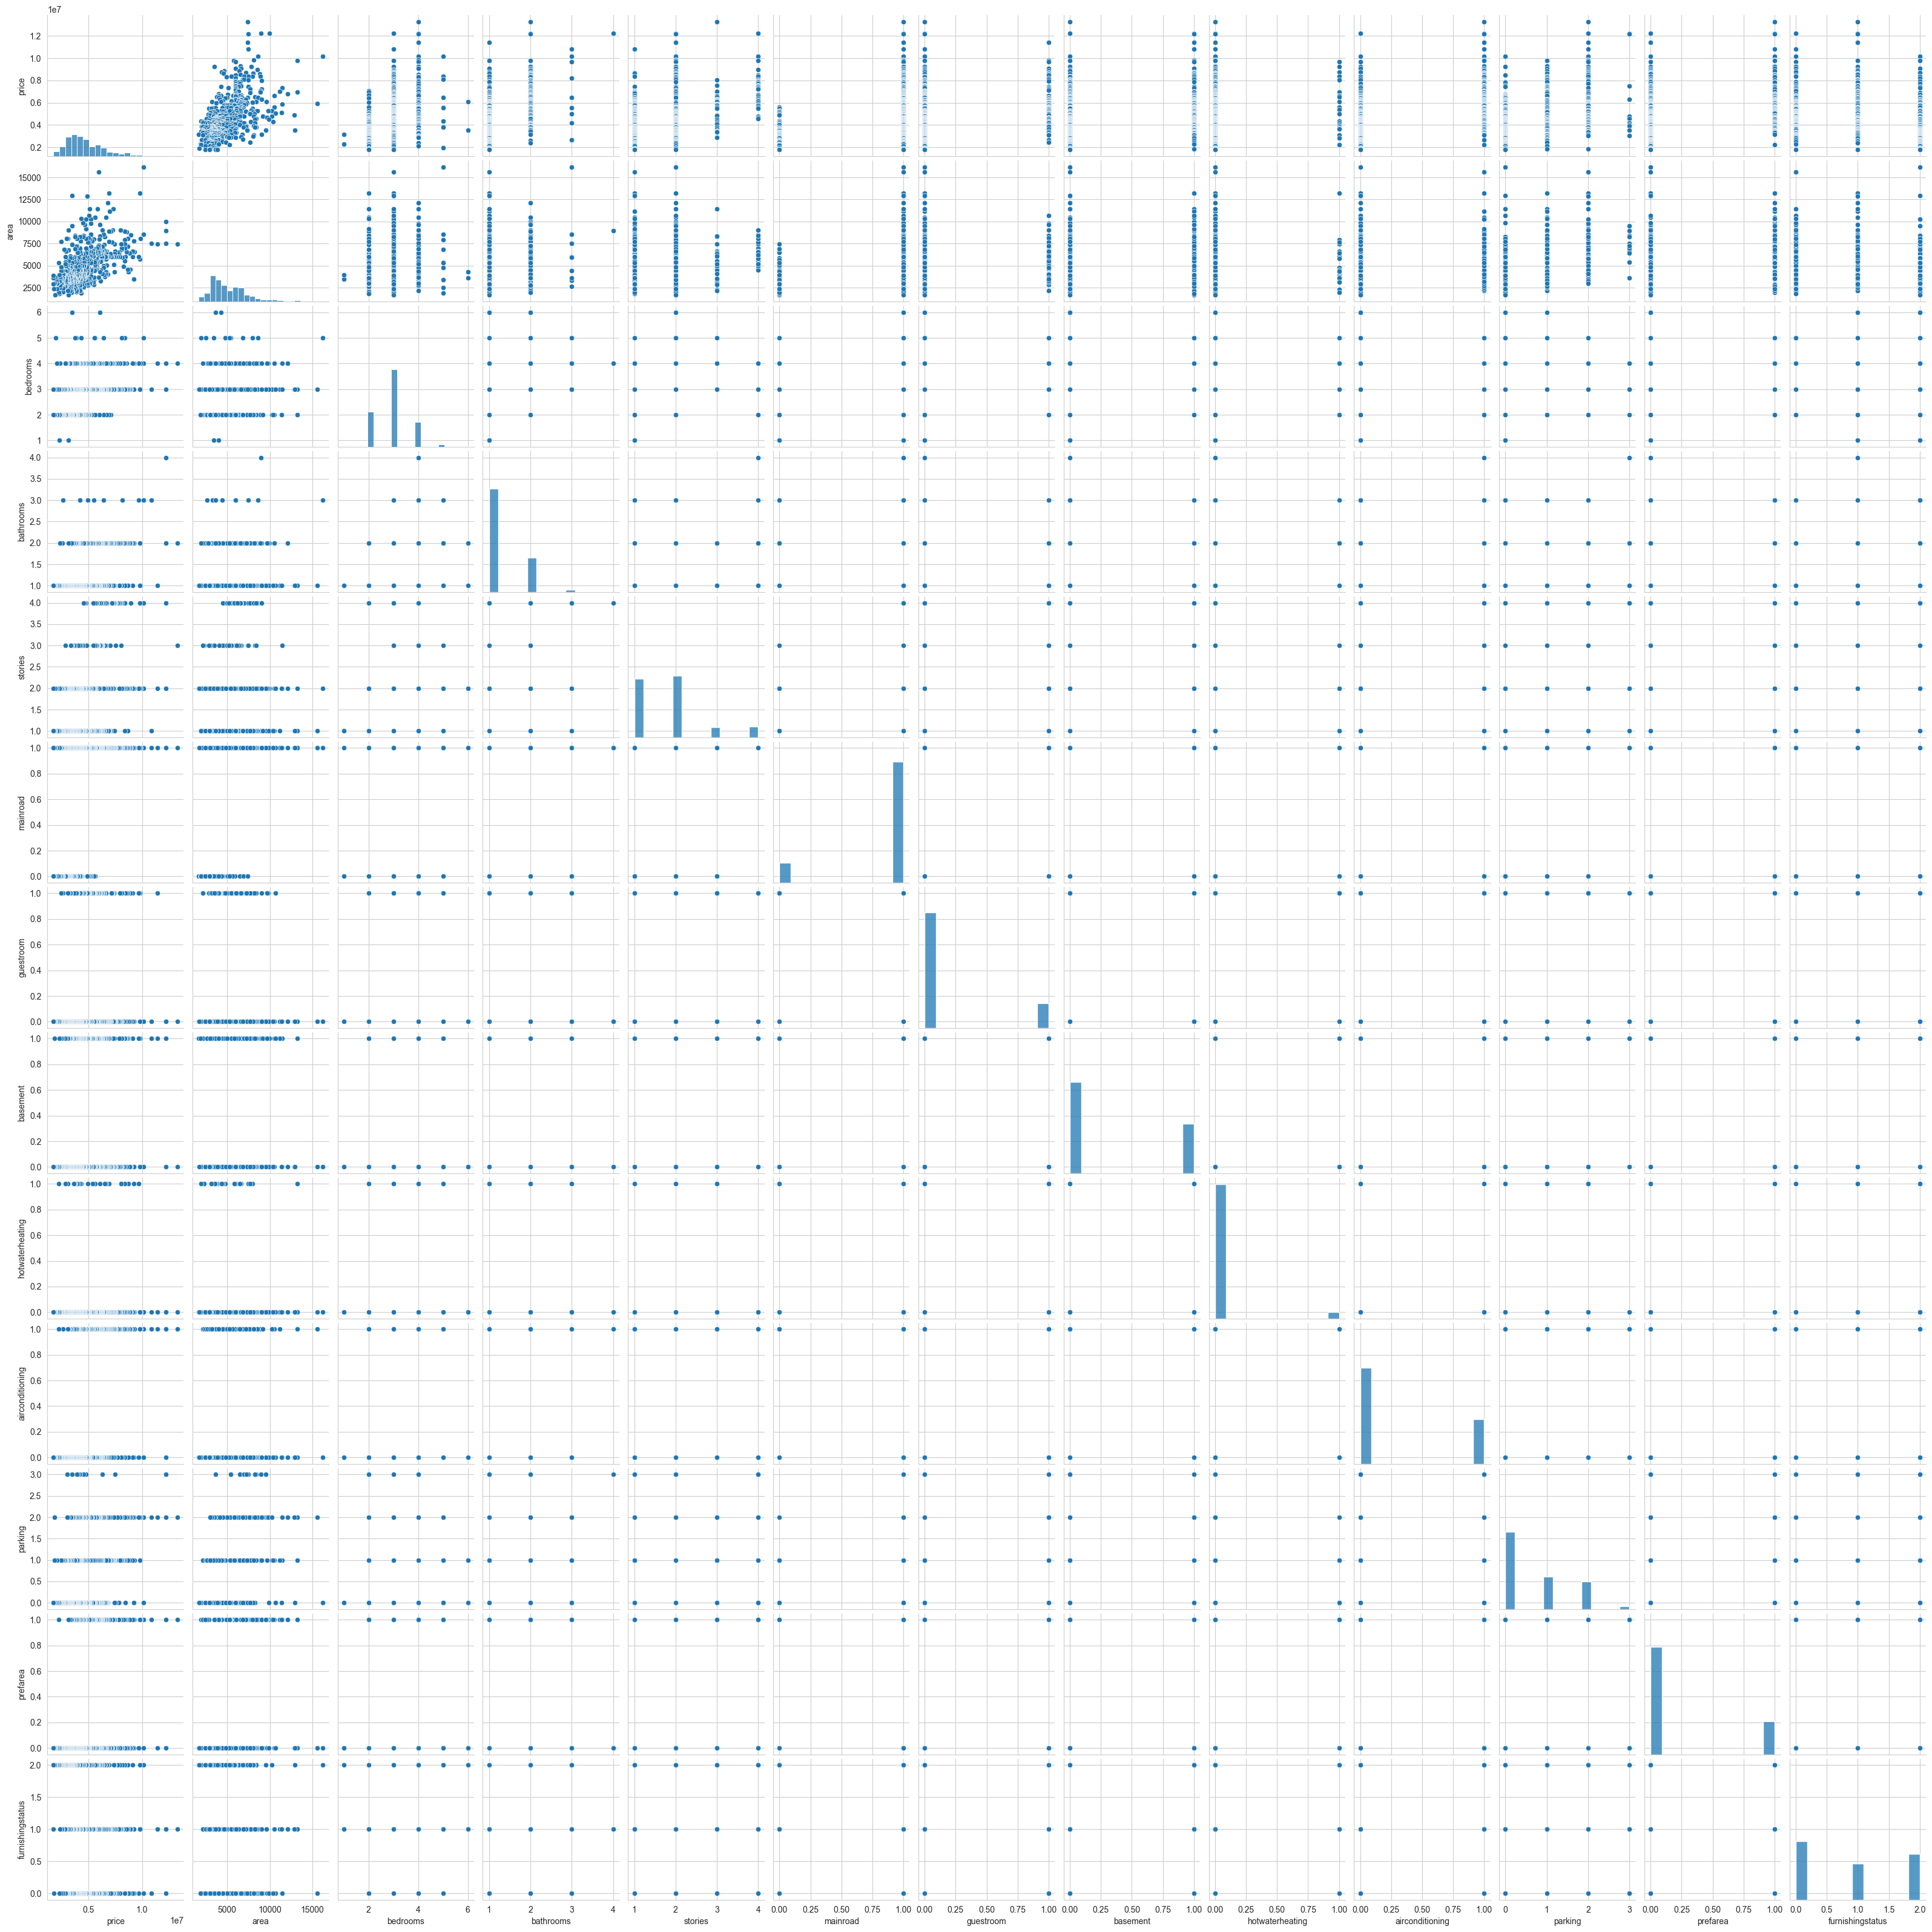

In [174]:
sns.pairplot(df)  
plt.show()            

The above graphs subplots variation of one parameter wrt other. For better visulization let's take some more graphs.

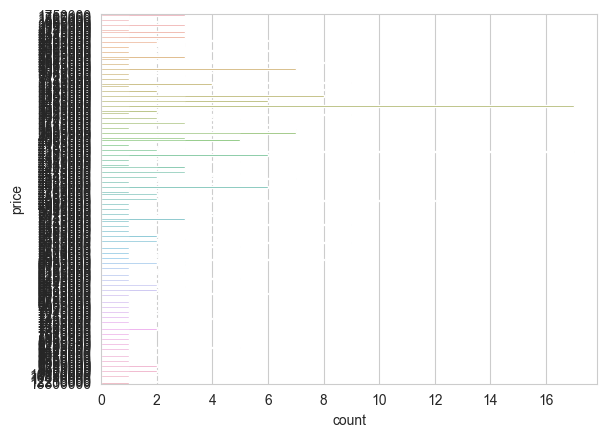

In [175]:
sns.countplot(y='price', data=df_copy)
plt.show()

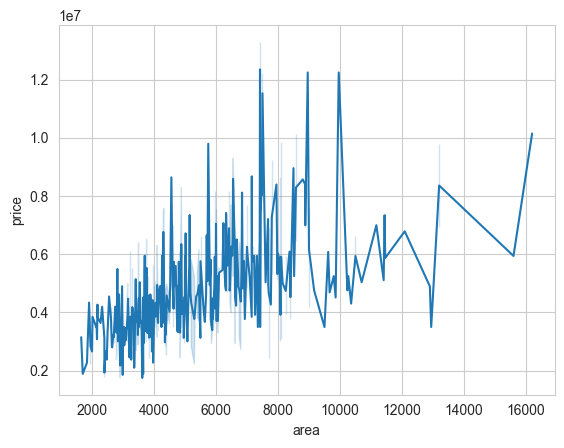

In [176]:
sns.lineplot(x='area', y='price', data=df_copy)
plt.show()

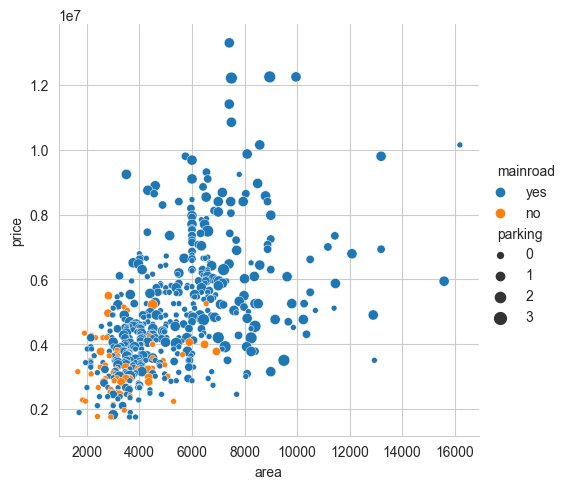

In [177]:
sns.relplot(x='area',y='price',hue='mainroad',size='parking',data=df_copy)

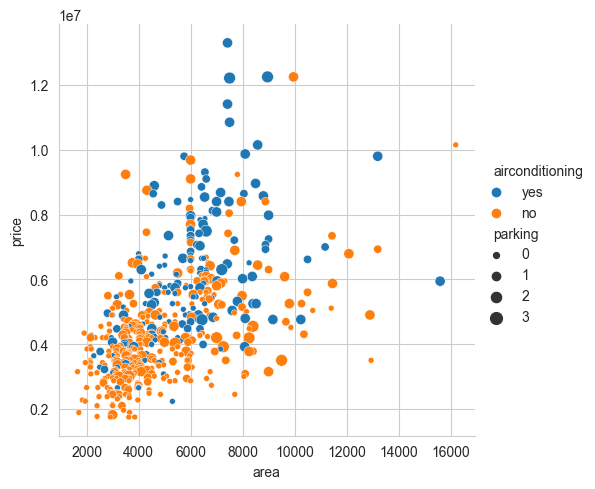

In [178]:
sns.relplot(x='area',y='price',hue='airconditioning',size='parking',data=df_copy)

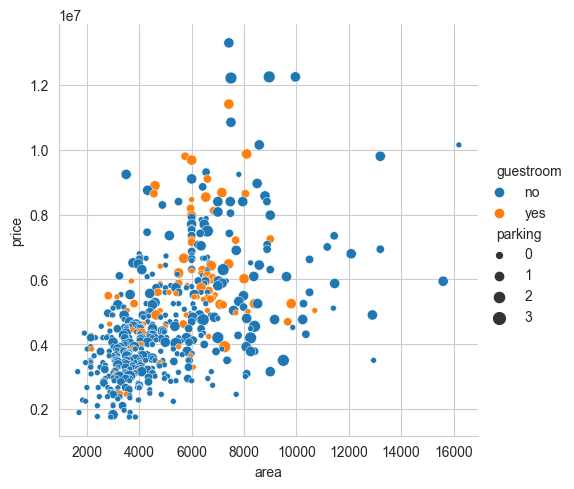

In [179]:
sns.relplot(x='area',y='price',hue='guestroom',size='parking',data=df_copy)

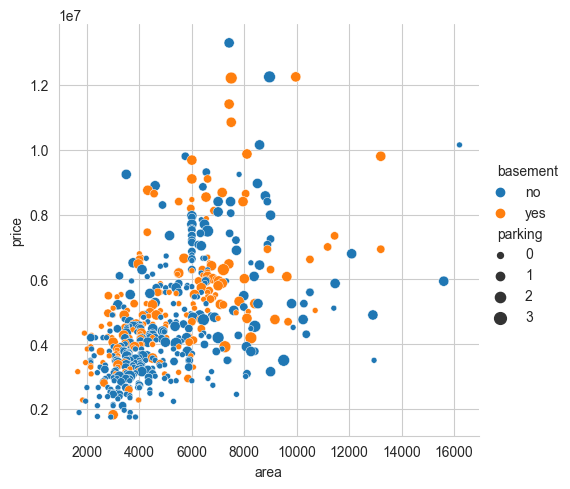

In [180]:
sns.relplot(x='area',y='price',hue='basement',size='parking',data=df_copy)

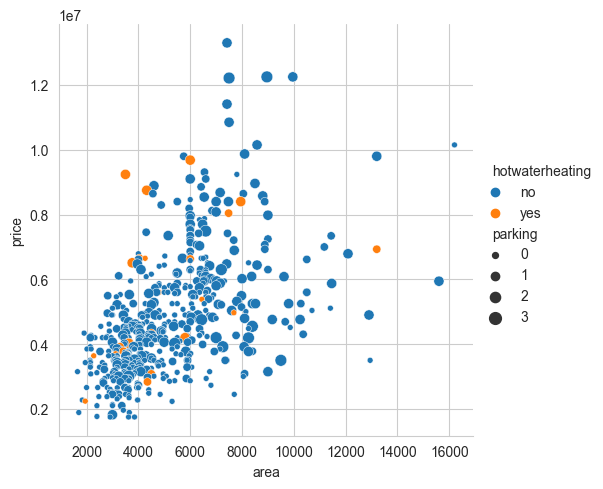

In [181]:
sns.relplot(x='area',y='price',hue='hotwaterheating',size='parking',data=df_copy)

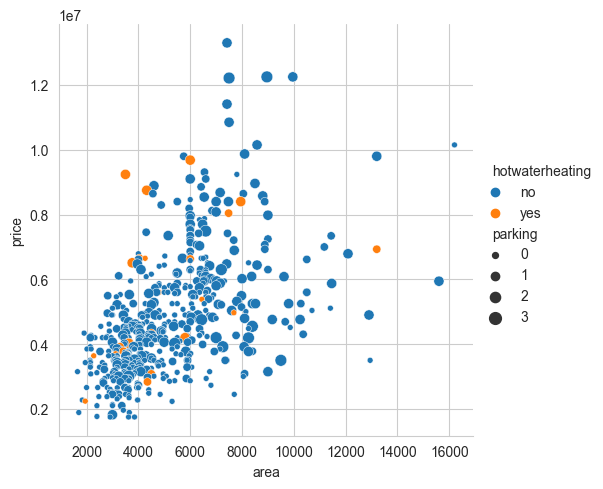

In [182]:
sns.relplot(x='area',y='price',hue='hotwaterheating',size='parking',data=df_copy)

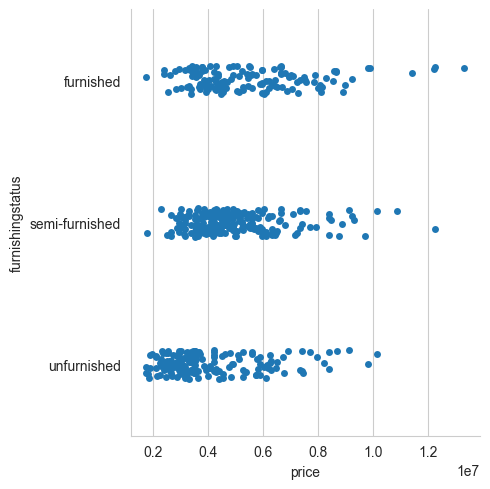

In [183]:
sns.catplot(x='price', y='furnishingstatus', data=df_copy)

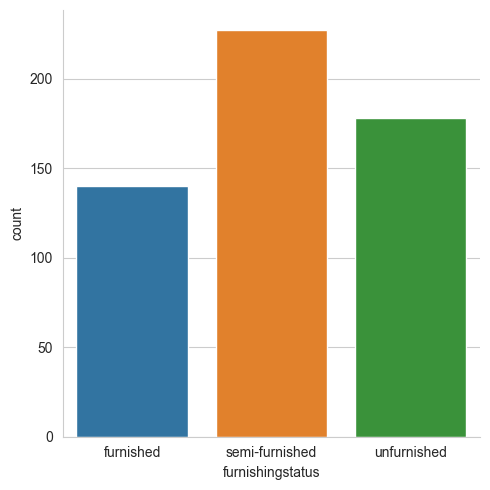

In [184]:
sns.catplot(x='furnishingstatus',kind='count',data=df_copy ,orient='h')

In the similar fashion we can create any graph & then visualize the same as per our need.

# **Part 3: Model Fitting**

**1. Data Scaling**

In given data some columns have very high values, some very low. to make an efficient model, it's necessary to scale the data in those numerical columns


In [185]:
df_new = df.copy(deep=True)
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories','parking']

df_new[num_columns] = MinMaxScaler().fit_transform(df_new[num_columns])

df_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1


**2. Test & Train data split**

Credits: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [186]:
y = df_new.pop('price')
x = df_new

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

**3. Model Training**

In [188]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

**4. Prediction**

In [189]:
y_pred = model.predict(x_test)

# **Part 4: Evaluation**

**Graphical visualization**

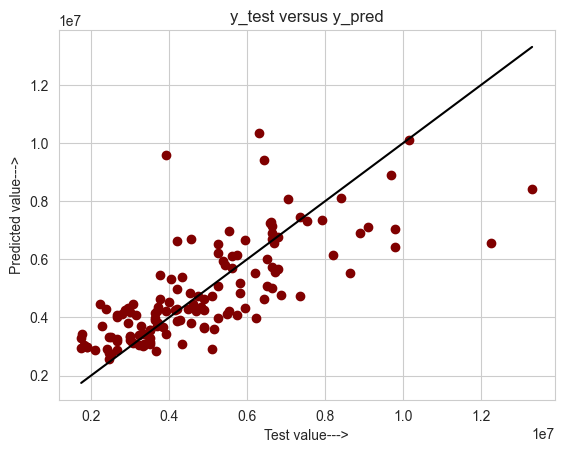

In [190]:
plt.scatter(y_test,y_pred, c='maroon')
x=y
plt.plot(x,y,c='k')   
plt.title('y_test versus y_pred')
plt.xlabel('Test value--->')                         
plt.ylabel('Predicted value--->') 
plt.show()

**Actual Price & Predicted price DataFrame**


In [191]:
per_error = 100*(y_pred-y_test)/y_test

df_prd_tst = pd.DataFrame({'Predicted Price':y_pred.astype('int64'), 'Actual Price':y_test, '% Error':per_error})
df_prd_tst.to_csv('prediction.csv')

In [199]:
df_prd_tst

,Predicted Price,Actual Price,% Error
316,5311250,4060000,30.818966
77,6911269,6650000,3.928863
360,3801490,3710000,2.466038
90,4634000,6440000,-28.043478
493,4115790,2800000,46.992500
...,...,...,...
172,6513920,5250000,24.074667
124,6667558,5950000,12.059812
388,3302798,3500000,-5.634333
521,2920604,2408000,21.287548


**Exporting Prediction as csv**

In [193]:
df_prd_tst.to_csv('Predictions.csv')

**Maximum, Minimum & Average Absolute Percentage Error**



In [194]:
abs(per_error).max()

144.18571428571428

In [195]:
abs(per_error).min()

0.22684310018903592

In [196]:
abs(per_error).mean()

22.694625872625593

**Root Mean Square Error (RMSE)**

In [197]:
mean_squared_error(y_test, y_pred, squared = False) 

#'Squared = False' will give RMSE.

1423616.305564202

**R2 Score**

In [198]:
r2_score(y_test, y_pred)

0.5602051488056436

# **FINAL WORDS**

This was our simple project of Machine Learning for Housing Price using Linear Regression Model.
